<a href="https://colab.research.google.com/github/shawnmuhr/BIOL_398/blob/main/HW_Solutions/biol300_hw8_group_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Problem 1: Dance of the p-values (20 points)

For this, we will return to frogs 2 and 3, the two frogs for which we were unable to reject the null hypothesis for having the same mean with a permutation test.

In [ ]:
frog2 = np.array([1612,  605,  327,  946,  541, 1539,  529,  628, 1453,  297,  703,
        269,  751,  245, 1182,  515,  435,  383,  457,  730])
frog3 = np.array([614, 414, 324, 776, 611, 544, 538, 579, 806, 459, 458, 626, 621,
       544, 535, 385, 401, 614, 665, 488])

A. Repeat your permutation test 100 times. Record the p-value you get each time.

First I redefine my permutation function from the individual portion:

In [ ]:
def permutation_p_value(data1, data2, num_reps=10000):

  # counter for p-value
  xtreme_counter = 0

  # true difference from the data
  data_diff = data1.mean() - data2.mean()

  # concatenate the data
  combined = np.concatenate((data1,data2))

  for i in range(num_reps):

    # scramble the data and get samples
    perm = np.random.permutation(combined)
    data1_samp = perm[:len(data1)]
    data2_samp = perm[len(data1):]

    # compute difference of means from sampled data
    diff = data1_samp.mean() - data2_samp.mean()

    # see if result is "as extreme"
    if np.abs(diff) >= np.abs(data_diff):
      xtreme_counter += 1

  p_value = xtreme_counter / num_reps

  return p_value

Now I call this function 100 times, saving the p-value each time:

In [ ]:
p_values = np.zeros(100)

for i in range(100):
  p_value = permutation_p_value(frog2, frog3)
  p_values[i] = p_value

B. Plot an ECDF of the p-values from the repeated permutation tests. How much do the p-values vary by? Would your decision to reject the null hypothesis or not change from repeating the permutation test?

In [ ]:
def ecdf(data):
  """Generate x and y values for plotting an ECDF."""
  x_vals = np.sort(data)
  y_vals = np.arange(1, len(data)+1) / len(data)
  
  return x_vals, y_vals

Text(0, 0.5, 'ECDF')

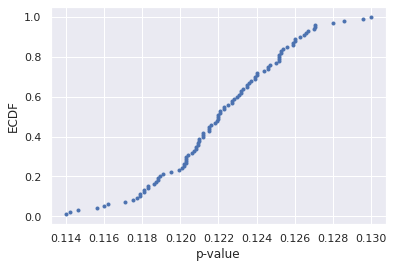

In [ ]:
x,y = ecdf(p_values)
plt.plot(x,y, '.')
plt.xlabel("p-value")
plt.ylabel("ECDF")

We see that while the p-value can vary some, it would not change our decision to not reject the null hypothesis.

While the p-values may not have varied that much in the previous part, a more interesting and more applicable question would be how much the p-value would change if we were to *repeat the experiment itself*. For this, we can simulate getting the data from frogs 2 and 3 again, by sampling from our data with replacement. As a reminder, this is how you can sample with replacement: `np.random.choice(frog2, size=20, replace=True)`.

C. For 100 trials, sample the two frogs with replacement to generate data as if we had repeated the experiment. With this newly sampled data, conduct a permutation test and save the p-value.


In [ ]:
p_values = np.zeros(100)

for i in range(100):
  frog2_samp = np.random.choice(frog2, size=20, replace=True)
  frog3_samp = np.random.choice(frog3, size=20, replace=True)
  p_value = permutation_p_value(frog2_samp, frog3_samp)
  p_values[i] = p_value

D. Plot an ECDF of these p-values that resulted from resampling the data for each permutation test. How much do the p-values vary by now? 

Text(0, 0.5, 'ECDF')

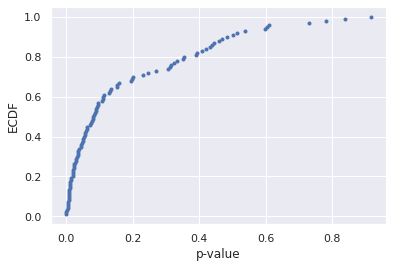

In [ ]:
x,y = ecdf(p_values)
plt.plot(x,y, '.')
plt.xlabel("p-value")
plt.ylabel("ECDF")

We now see that the p-values vary by **a lot**. The p-values nearly span the entire possible range of 0 to 1.

E. Explain how this exercise serves as a cautionary tale regarding the reliance on p-values in experimental work.

We see that under the very reasonable simulation of "repeating the experiment," we can get wildly different p-values. This means we should exercise caution when relying on a p-value from a single experiment. A slight, and experimentally possible, change in the data can lead to an entirely different interpretation. 

# Problem 2: Darwin's finches (20 points)

The following data come from Peter and Rosemary Grant of Princeton University, who have visited the island of Daphne Major on the Galápagos every year for over forty years and have been taking a careful inventory of the finches there. The Grants recently published a wonderful book, [40 years of evolution: Darwin's finches on Daphne Major Island](https://press.princeton.edu/books/hardcover/9780691160467/40-years-of-evolution). They were generous and made their data publicly available on [the Dryad data repository](https://datadryad.org/stash/dataset/doi:10.5061/dryad.g6g3h). (In general, it is a very good idea to put your published data in public data repositories, both to preserve the data and also to make your findings public.) We will be using this data set to learn about evolution of Darwin's finches and use your "hacker" statistics skills. 

We will focus on the primary two species of ground finch on Daphne Major, *Geospiza fortis* and *Geospiza scandens*. In this data set, you will find measurements of the beak length (tip to base) and beak depth (top to bottom) of these finches in the years 1973, 1975, 1987, 1991, and 2012. Also included in that data set is the band number for the bird, which gives a unique identifier.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/BIOL300_S22/data/finch_beaks.csv"
df = pd.read_csv(path)
df.head()

,band,species,year,beak length (mm),beak depth (mm)
0,20123,fortis,1973,9.25,8.05
1,20126,fortis,1973,11.35,10.45
2,20128,fortis,1973,10.15,9.55
3,20129,fortis,1973,9.95,8.75
4,20133,fortis,1973,11.55,10.15


A. Plot ECDFs of the beak depths of G*eospiza scandens* in 1975 and in 2012, and comment on what you see.

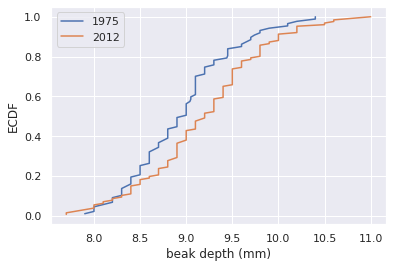

In [ ]:
# pare down the df to the species and years we care about
scandens = df[df["species"]=="scandens"]
s75 = scandens[scandens["year"]==1975]
s12 = scandens[scandens["year"]==2012]

# get ECDF values
x1,y1 = ecdf(s75["beak depth (mm)"])
x2,y2 = ecdf(s12["beak depth (mm)"])

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.xlabel("beak depth (mm)")
plt.ylabel("ECDF")
plt.legend([1975, 2012])

It seems like the beak depth is larger in 2012 than 1975.

B. For the *scandens* data in 1975, sample the data 10,000 times with replacement and record the mean with each sample. Sort these samples and find the 2.5th and 97.5th percentiles. The range between these two values is what is known as the 95% confidence interval, meaning that 95% of the sample lie within this range. 

In [ ]:
bd75_mean_samps = np.zeros(10000)

for i in range(10000):
  samp = np.random.choice(s75["beak depth (mm)"], size=len(s75), replace=True)
  bd75_mean_samps[i] = samp.mean()

bd75_mean_samps.sort()
lowerCI = bd75_mean_samps[249]
upperCI = bd75_mean_samps[-250]
print("95% CI:", np.round(lowerCI, 3), "-", np.round(upperCI, 3))

95% CI: 8.844 - 9.078


C. Now get the *scandens* 95% confidence interval for the year 2012. Comment on the overlap (if any) of the confidence intervals from 1975 and 2012.

In [ ]:
bd12_mean_samps = np.zeros(10000)

for i in range(10000):
  samp = np.random.choice(s12["beak depth (mm)"], size=len(s12), replace=True)
  bd12_mean_samps[i] = samp.mean()

bd12_mean_samps.sort()
lowerCI = bd12_mean_samps[249]
upperCI = bd12_mean_samps[-250]
print("95% CI:", np.round(lowerCI, 3), "-", np.round(upperCI, 3))

95% CI: 9.073 - 9.306


We see that the confidence intervals overlap just slightly. The upper part of the 1975 CI overlaps with the lower part of the 2012 CI.

D. Perform a hypothesis test comparing the G. scandens beak depths in 1975 and 2012. Carefully state your null hypothesis, your test statistic, and your definition of what it means to be at least as extreme as the test statistic. Comment on the results. 

As an example of a different type of hypothesis test, I will do a shifted mean test below. Here, the null hypothesis is that the two years have the same mean. The test statistic is the difference in means between the two years. "As extreme" will be if the absolute value of the difference in the means is equal to or greater than than what is seen in the data, meaning this is a two-tailed test. (Note: for a one-tailed test, we would only be interested in seeing if the mean for 2012 is greater than the mean for 1975).

In [ ]:
def shifted_mean_p_value(data1, data2, num_reps=10000):

  # counter for p-value
  xtreme_counter = 0

  # true difference from the data
  data_diff = data1.mean() - data2.mean()

  # shift the data
  total_mean = (data1.mean() + data2.mean()) / (len(data1) + len(data2))
  data1_shifted = data1 - data1.mean() + total_mean
  data2_shifted = data2 - data2.mean() + total_mean

  for i in range(num_reps):

    # sample the shifted data
    data1_samp = np.random.choice(data1_shifted, size=len(data1_shifted), replace=True)
    data2_samp = np.random.choice(data2_shifted, size=len(data2_shifted), replace=True)

    # compute difference of means from sampled data
    diff = data1_samp.mean() - data2_samp.mean()

    # see if result is "as extreme"
    if np.abs(diff) >= np.abs(data_diff):
      xtreme_counter += 1

  p_value = xtreme_counter / num_reps

  return p_value

In [ ]:
shifted_mean_p_value(s75["beak depth (mm)"], s12["beak depth (mm)"], num_reps=10000)

0.0067

From a p-value of ~0.007, we can reject the null hypothesis that these two years have the same mean. It seems that the beaks in 2012 are in fact statistically significantly larger than 1975.

E. It might be interesting to know that a severe drought in 1976 and 1977 resulted in the death of the plants that produce small seeds on the island. Hypothesize what might have happened to the scandens beaks from 1975 to 2012.

It seems that an increase in seed size drove the increase in beak size. That is, after the drought it is likely the case that birds with bigger beaks had an advantage over birds with smaller beaks. These larger-beaked birds were thus more likely to survive and pass on their genes, resulting in a shift in the population over time.